# Programming with Python Course Exam: NR Gilfillan

The following code has been written to fulfill the requirements for the course Assessment/Exam. Comments will be made inside the code as well as markdowns before specific sections of the code. 

The following section installs all of the required packages. This code was written on a Windows 10 computer. 

In [6]:
!pip install pandas
!pip install numpy
!pip install sqlalchemy
!pip install matplotlib

  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


Setup/import the packages to be used

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import sqlite3
from sqlite3 import Error
from sqlalchemy import create_engine

The following section will set up the function and classes to be used in the project

In [100]:
#SQL create connection function
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print("Successful connection/creation of SQL database, SQL version: " + sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

#SQL create table function
def create_table(db_file,tablename,colums):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        sqlite_create_table_query = '''CREATE TABLE '''+ tablename +''' ( '''+ colums + ''' );'''
        cursor = conn.cursor()
        cursor.execute(sqlite_create_table_query)
        conn.commit()
        
    except Error as e:
        print("Was unable to perform operation on SQL database: " + db_file + " due to: ")
        print(e)
    finally:
        if conn:
            cursor.close()
            conn.close()

The following section loads the data from the csv files for analysis.


In [179]:
#load training datasets
Training_dictionary = {}
for number in range(1,5):
    td = pd.read_csv ('Train' + str(number) +'.csv')
    Training_dictionary["Set%s" %number] = td.rename(columns={'Y': 'Y' + str(number)})

#Combine training data into a single object
for key in Test_dictionary.keys():
    if key=="Set1":
        Trainingdata=Training_dictionary["Set1"]
    else:
        Trainingdata = pd.merge(Trainingdata,Training_dictionary[key], on=["X"])
print(Trainingdata)

#load test datasets
Testdata = pd.read_csv ('Test.csv')
print(Testdata)

#load ideal functions
Ideal_dictionary = {}
for number in range(1,5):
    td = pd.read_csv ('Ideal' + str(number) +'.csv')
    Ideal_dictionary["Set%s" %number] = td.rename(columns={'Y': 'Y' + str(number)})

    
for key in Ideal_dictionary.keys():
    if key=="Set1":
        Idealdata=Ideal_dictionary["Set1"]
    else:
        Idealdata = pd.merge(Idealdata,Ideal_dictionary[key], on=["X"])
print(Idealdata)    


     X   Y1   Y2   Y3   Y4
0    1    2    2    2    2
1    2    4    4    4    4
2    3    6    6    6    6
3    4    8    8    8    8
4    5   10   10   10   10
..  ..  ...  ...  ...  ...
94  95  190  190  190  190
95  96  192  192  192  192
96  97  194  194  194  194
97  98  196  196  196  196
98  99  198  198  198  198

[99 rows x 5 columns]
     X    Y
0    1    2
1    2    4
2    3    6
3    4    8
4    5   10
..  ..  ...
94  95  190
95  96  192
96  97  194
97  98  196
98  99  198

[99 rows x 2 columns]
     X   Y1   Y2   Y3   Y4
0    1    2    2    2    2
1    2    4    4    4    4
2    3    6    6    6    6
3    4    8    8    8    8
4    5   10   10   10   10
..  ..  ...  ...  ...  ...
94  95  190  190  190  190
95  96  192  192  192  192
96  97  194  194  194  194
97  98  196  196  196  196
98  99  198  198  198  198

[99 rows x 5 columns]


In [134]:
Training_dictionary = Training_dictionary["Set1"].rename(columns={'Y': 'Y' + str(1)})
print(Training_dictionary)

     X   Y1
0    1    2
1    2    4
2    3    6
3    4    8
4    5   10
..  ..  ...
94  95  190
95  96  192
96  97  194
97  98  196
98  99  198

[99 rows x 2 columns]


Create SQLite Databases from the imported data sets

In [186]:
#Create SQL Database file
create_connection(r"examsqlite.db")

#insert training data Table into SQL Database - TABLENAME: Training_Data
column_tocreate ="X INTEGER UNIQUE PRIMARY KEY,Y1_training_func REAL NOT NULL,Y2_training_func REAL NOT NULL,Y3_training_func REAL NOT NULL,Y4_training_func REAL NOT NULL"
create_table(r"examsqlite.db",r"Training_Data",column_tocreate)

#insert ideal functions data Table into SQL Database - TABLENAME: Ideal_Functions
column_tocreate ="X INTEGER UNIQUE PRIMARY KEY"

for number in range(1,51):
    column_tocreate=column_tocreate + ",Y" + str(number) + " REAL NOT NULL"
create_table(r"examsqlite.db",r"Ideal_Functions",column_tocreate)

#insert testing data Table into SQL Database - TABLENAME: Test
column_tocreate ="X INTEGER UNIQUE PRIMARY KEY,Y_test_function REAL NOT NULL,Delta_y_test_fucntion REAL NOT NULL,no_of_ideal_function REAL NOT NULL"
create_table(r"examsqlite.db",r"Test_data",column_tocreate)

#Write data from the imported csv datafiles into the SQL Tables
conn = sqlite3.connect("examsqlite.db")
Trainingdata.to_sql('Training_Data', con=conn, if_exists='replace')
Idealdata.to_sql('Idealdata', con=conn, if_exists='replace')
Testdata.to_sql('Test_data', con=conn, if_exists='replace')
conn.close()

Successful connection/creation of SQL database, SQL version: 2.6.0
Was unable to perform operation on SQL databaseexamsqlite.db due to: 
table Training_Data already exists
Was unable to perform operation on SQL databaseexamsqlite.db due to: 
table Ideal_Functions already exists
Was unable to perform operation on SQL databaseexamsqlite.db due to: 
table Test_data already exists


In [171]:
Testdata=[]
#Testdata=Test_dictionary["Set1"].iloc[:,0]
#Testdata.array
#for key in Test_dictionary.keys():
#    print(key)
#print(Testdata)

for key in Test_dictionary.keys():
    print(key)
    if key=="Set1":
        Testdata=Training_dictionary["Set1"]
    else:
        Testdata = pd.merge(Testdata,Training_dictionary[key], on=["X"])

#Testdata = pd.concat(Training_dictionary, axis =1)
#Testdata = pd.merge(Training_dictionary["Set1"],Training_dictionary["Set2"], on=["X"])
#print(Training_dictionary["Set1"])
print(Testdata)

Set1
Set2
Set3
Set4
     X   Y1   Y2   Y3   Y4
0    1    2    2    2    2
1    2    4    4    4    4
2    3    6    6    6    6
3    4    8    8    8    8
4    5   10   10   10   10
..  ..  ...  ...  ...  ...
94  95  190  190  190  190
95  96  192  192  192  192
96  97  194  194  194  194
97  98  196  196  196  196
98  99  198  198  198  198

[99 rows x 5 columns]


In [137]:
Testdata = pd.concat([Test_dictionary["Set1"], Test_dictionary["Set2"]], ignore_index=True)
print(Testdata)

      X    Y
0     1    2
1     2    4
2     3    6
3     4    8
4     5   10
..   ..  ...
193  95  190
194  96  192
195  97  194
196  98  196
197  99  198

[198 rows x 2 columns]


In [107]:






conn = sqlite3.connect(r"examsqlite.db")
df = pd.read_sql_query("SELECT * from Test", conn)
Test_dictionary
surveys2002.to_sql("Test", conn, if_exists="replace")
# Verify that result of SQL query is stored in the dataframe
print(df.head())

con.close()

   X  Y_test_function  Delta_y_test_fucntion  no_of_ideal_function
0  1              2.0                    3.0                   4.0


Analysis and run regressions on the training data against the 

In [42]:
print(Training_dictionary["Set1"].iloc[:,0])
type(Training_dictionary["Set1"].iloc[:,1])

0      1
1      2
2      3
3      4
4      5
      ..
94    95
95    96
96    97
97    98
98    99
Name: X, Length: 99, dtype: int64


pandas.core.series.Series

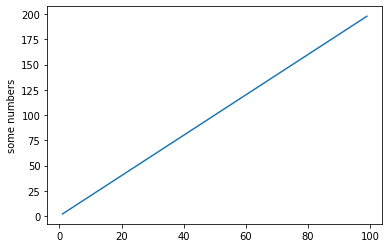

In [45]:
#Test plot line
plt.plot(Training_dictionary["Set1"].iloc[:,0],Training_dictionary["Set1"].iloc[:,1])
plt.ylabel('some numbers')
plt.show()

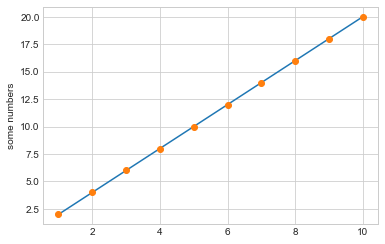

In [49]:
#Test plot scatter with line

plt.plot(Training_dictionary["Set1"].iloc[0:10,0],Training_dictionary["Set1"].iloc[0:10,1],Training_dictionary["Set1"].iloc[0:10,0],Training_dictionary["Set1"].iloc[0:10,1],"o")
plt.ylabel('some numbers')
plt.show()